In [140]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [141]:
car_dataset = pd.read_csv('/content/Car dataset.csv')

In [142]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [143]:
car_dataset.shape

(4340, 8)

In [144]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [145]:
car_dataset.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [146]:
car_dataset['fuel'].value_counts()

,count
fuel,
Diesel,2153
Petrol,2123
CNG,40
LPG,23
Electric,1


In [147]:
car_dataset['seller_type'].value_counts()

,count
seller_type,
Individual,3244
Dealer,994
Trustmark Dealer,102


In [148]:
car_dataset['transmission'].value_counts()

,count
transmission,
Manual,3892
Automatic,448


In [149]:
car_dataset['owner'].value_counts()

,count
owner,
First Owner,2832
Second Owner,1106
Third Owner,304
Fourth & Above Owner,81
Test Drive Car,17


In [150]:
# Extract the first word by splitting on spaces
car_dataset['car_brand'] = car_dataset['name'].apply(lambda x: x.split(" ")[0])
# Move 'Car Brand' column to the first position
car_dataset.insert(0, 'car_brand', car_dataset.pop('car_brand'))
car_dataset.drop(['name'],axis=1,inplace=True)

In [151]:
car_dataset.head()

,car_brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [152]:
car_dataset['car_brand'].unique()

array(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
       'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep',
       'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat',
       'Volkswagen', 'Volvo', 'Mitsubishi', 'Land', 'Daewoo', 'MG',
       'Force', 'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia'], dtype=object)

In [153]:
car_dataset['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [154]:
car_dataset['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [155]:
car_dataset['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [156]:
car_dataset['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [157]:
X = car_dataset.drop(['selling_price'],axis=1)
Y = car_dataset['selling_price']

In [158]:
print(X)

     car_brand  year  km_driven    fuel seller_type transmission         owner
0       Maruti  2007      70000  Petrol  Individual       Manual   First Owner
1       Maruti  2007      50000  Petrol  Individual       Manual   First Owner
2      Hyundai  2012     100000  Diesel  Individual       Manual   First Owner
3       Datsun  2017      46000  Petrol  Individual       Manual   First Owner
4        Honda  2014     141000  Diesel  Individual       Manual  Second Owner
...        ...   ...        ...     ...         ...          ...           ...
4335   Hyundai  2014      80000  Diesel  Individual       Manual  Second Owner
4336   Hyundai  2014      80000  Diesel  Individual       Manual  Second Owner
4337    Maruti  2009      83000  Petrol  Individual       Manual  Second Owner
4338   Hyundai  2016      90000  Diesel  Individual       Manual   First Owner
4339   Renault  2016      40000  Petrol  Individual       Manual   First Owner

[4340 rows x 7 columns]


In [159]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


In [160]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=1)

In [161]:
print(X.shape, X_train.shape, X_test.shape)

(4340, 7) (3906, 7) (434, 7)


In [162]:
processor = ColumnTransformer(
    transformers=[
        ("ohe", OneHotEncoder(drop="first"),["car_brand","fuel", "seller_type", "transmission", "owner"]),
        ("stdscl", StandardScaler(),["km_driven", "year"])
    ])

In [163]:
model = RandomForestRegressor(n_estimators=10)

In [164]:
pipeline = Pipeline(steps=[
    ("processor", processor),
    ("model", model)
])

In [165]:
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  ['car_brand', 'fuel',
                                                   'seller_type',
                                                   'transmission', 'owner']),
                                                 ('stdscl', StandardScaler(),
                                                  ['km_driven', 'year'])])),
                ('model', RandomForestRegressor(n_estimators=10))])

In [166]:
X_train_prediction = pipeline.predict(X_train)

In [167]:
score_1 = metrics.r2_score(Y_train, X_train_prediction)
print(score_1)

0.9567357614883053


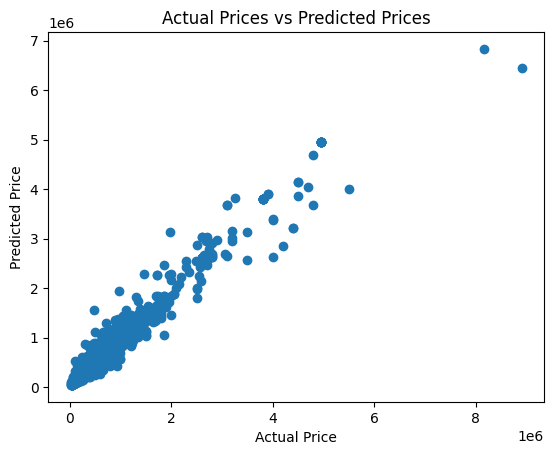

In [168]:
plt.scatter(Y_train, X_train_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [169]:
X_test_prediction = pipeline.predict(X_test)

In [170]:
score_2 = metrics.r2_score(Y_test, X_test_prediction)
print(score_2)

0.9100191427455707


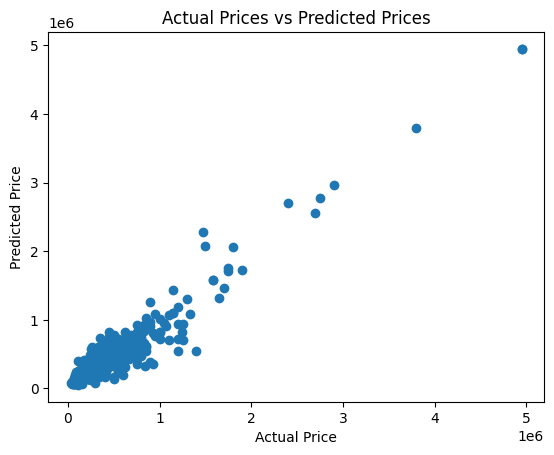

In [171]:
plt.scatter(Y_test, X_test_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [172]:
# Save the pipeline model using pickle
with open('predict_car_price.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

In [173]:
input_data = ('Maruti',2007,50000,'Petrol','Dealer','Manual','First Owner') # Include car_brand
# Create a DataFrame with the correct column names, including car_brand
input_df = pd.DataFrame([input_data], columns=['car_brand','year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner'])
# Now you can use the pipeline to predict
prediction = pipeline.predict(input_df)
print(prediction)

[134000.]
